In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns

In [397]:
%matplotlib inline
pp.style.use('seaborn-ticks')

In [398]:
def figsize(scale):
    """Calculate figure size with golden ratio and Latex line width."""

    fig_width_pt = 433.62001
    inches_per_pt = 1.0/72.0
    golden_mean = (np.sqrt(5.0)-1.0)/2.0
    fig_width = fig_width_pt*inches_per_pt*scale
    fig_height = fig_width*golden_mean
    fig_size = [fig_width, fig_height]
    return fig_size

In [399]:
figsize(1)

[6.022500138888888, 3.7221097830842953]

In [400]:
# Load inputs to calculation from .csv files.
asym_corr = pd.read_csv('data/al_asym_corrections_august_23_2017.csv')
bk_frac = pd.read_csv('data/mc_apv_input_background_fraction.csv')

In [401]:
# Concatenate asymmetry corrections and calculated background fractions
inputs = pd.concat([asym_corr, bk_frac], axis=1)

In [433]:
inputs_t = inputs.transpose()
inputs_t.to_csv('data/mc_apv_inputs_test.csv')

In [402]:
n_sample = 10000 # Number of Samples
label = inputs.columns
sample = np.arange(0,n_sample)

In [403]:
index = pd.MultiIndex.from_product([label,sample],names=['label','sample'])

In [404]:
data = pd.DataFrame(np.array(inputs.loc[0])*np.ones((len(label)*len(sample),(len(label)))), index=index, columns=label)

In [405]:
def fill_diagonal(inputs, df, label):
    for l in label:
        df[l].loc[l] = np.random.normal(inputs[l].loc[0], inputs[l].loc[1], len(sample))

In [406]:
fill_diagonal(inputs, data, label)

In [407]:
data['A_pv'] = np.ones((len(label)*len(sample),1))

In [408]:
data.head()

A_msr  A_reg  A_trans  A_nonlin  A_Q  A_beamline  A_bias  \
label sample                                                                
A_msr 0       1.387762    0.0      0.0       0.0  0.0     0.00658   0.005   
      1       1.496146    0.0      0.0       0.0  0.0     0.00658   0.005   
      2       1.455589    0.0      0.0       0.0  0.0     0.00658   0.005   
      3       1.442413    0.0      0.0       0.0  0.0     0.00658   0.005   
      4       1.457069    0.0      0.0       0.0  0.0     0.00658   0.005   

                  P  A_neutral  A_quasi  ...      f_GDR      f_Zn      f_Mg  \
label sample                             ...                                  
A_msr 0       0.888        1.7    -0.33  ...   0.004251  0.017377  0.010559   
      1       0.888        1.7    -0.33  ...   0.004251  0.017377  0.010559   
      2       0.888        1.7    -0.33  ...   0.004251  0.017377  0.010559   
      3       0.888        1.7    -0.33  ...   0.004251  0.017377  0.010559   
      4       0.888        1.7    -0.33  ...   0.004251  0.017377  0.010559   

                  f_Cu      f_Cr      f_Fe      f_Si      f_Mn     f_Ti  A_pv  
label sample                                                                   
A_msr 0       0.004462  0.000829  0.000536  0.000602  0.000178  0.00009   1.0  
      1       0.004462  0.000829  0.000536  0.000602  0.000178  0.00009   1.0  
      2       0.004462  0.000829  0.000536  0.000602  0.000178  0.00009   1.0  
      3       0.004462  0.000829  0.000536  0.000602  0.000178  0.00009   1.0  
      4       0.004462  0.000829  0.000536  0.000602  0.000178  0.00009   1.0  

[5 rows x 56 columns]

In [434]:
def calculate_apv_uncertainty(inputs, label):
    '''Calculate A_pv uncertainty'''
    
    for l in label:
        # Calculate the A_msr/P ratio
        A_msr_pol = (inputs.loc[l].A_msr +
                     inputs.loc[l].A_reg +
                     inputs.loc[l].A_trans +
                     inputs.loc[l].A_nonlin +
                     inputs.loc[l].A_Q +
                     inputs.loc[l].A_beamline +
                     inputs.loc[l].A_bias)/inputs.loc[l].P

        # Calculate numerator
        A_num = A_msr_pol - (inputs.loc[l].f_neutral * inputs.loc[l].A_neutral +
                             inputs.loc[l].f_quasi * inputs.loc[l].A_quasi +
                             inputs.loc[l].f_inelastic * inputs.loc[l].A_inelastic +
                             inputs.loc[l].f_844keV * inputs.loc[l].A_844keV +
                             inputs.loc[l].f_1014keV * inputs.loc[l].A_1014keV +
                             inputs.loc[l].f_2211keV * inputs.loc[l].A_2211keV +
                             inputs.loc[l].f_2735keV * inputs.loc[l].A_2735keV +
                             inputs.loc[l].f_2990keV * inputs.loc[l].A_2990keV +
                             inputs.loc[l].f_4580keV * inputs.loc[l].A_4580keV +
                             inputs.loc[l].f_4812keV * inputs.loc[l].A_4812keV +
                             inputs.loc[l].f_5430keV * inputs.loc[l].A_5430keV +
                             inputs.loc[l].f_5668keV * inputs.loc[l].A_5668keV +
                             inputs.loc[l].f_7228keV * inputs.loc[l].A_7228keV +
                             inputs.loc[l].f_7477keV * inputs.loc[l].A_7477keV +
                             inputs.loc[l].f_GDR * inputs.loc[l].A_GDR +
                             inputs.loc[l].f_Zn * inputs.loc[l].A_Zn +
                             inputs.loc[l].f_Mg * inputs.loc[l].A_Mg +
                             inputs.loc[l].f_Cu * inputs.loc[l].A_Cu +
                             inputs.loc[l].f_Cr * inputs.loc[l].A_Cr +
                             inputs.loc[l].f_Fe * inputs.loc[l].A_Fe +
                             inputs.loc[l].f_Si * inputs.loc[l].A_Si +
                             inputs.loc[l].f_Mn * inputs.loc[l].A_Mn +
                             inputs.loc[l].f_Ti * inputs.loc[l].A_Ti)

        # Calculate denominator
        A_denom = 1.0 - (inputs.loc[l].f_beamline +
                         inputs.loc[l].f_neutral +
                         inputs.loc[l].f_quasi +
                         inputs.loc[l].f_inelastic +
                         inputs.loc[l].f_844keV +
                         inputs.loc[l].f_1014keV +
                         inputs.loc[l].f_2211keV +
                         inputs.loc[l].f_2735keV +
                         inputs.loc[l].f_2990keV +
                         inputs.loc[l].f_4580keV +
                         inputs.loc[l].f_4812keV +
                         inputs.loc[l].f_5430keV +
                         inputs.loc[l].f_5668keV +
                         inputs.loc[l].f_7228keV +
                         inputs.loc[l].f_7477keV +
                         inputs.loc[l].f_GDR +
                         inputs.loc[l].f_Zn +
                         inputs.loc[l].f_Mg +
                         inputs.loc[l].f_Cu +
                         inputs.loc[l].f_Cr +
                         inputs.loc[l].f_Fe +
                         inputs.loc[l].f_Si +
                         inputs.loc[l].f_Mn +
                         inputs.loc[l].f_Ti)
        A_pv = A_num / A_denom #R included R factor later 
        # Calculate the parity-violating physics asymmetry
        inputs.loc[l,'A_pv'] = np.array(A_pv)

In [435]:
def calculate_apv(inputs):
    '''Calculate A_pv'''

    # Calculate the A_msr/P ratio
    A_msr_pol = (inputs.loc['A_msr'].A_msr +
                 inputs.loc['A_reg'].A_reg +
                 inputs.loc['A_trans'].A_trans +
                 inputs.loc['A_nonlin'].A_nonlin +
                 inputs.loc['A_Q'].A_Q +
                 inputs.loc['A_beamline'].A_beamline +
                 inputs.loc['A_bias'].A_bias)/inputs.loc['P'].P
    # Calculate numerator
    A_num = A_msr_pol - (inputs.loc['f_neutral'].f_neutral * inputs.loc['A_neutral'].A_neutral +
                         inputs.loc['f_quasi'].f_quasi * inputs.loc['A_quasi'].A_quasi +
                         inputs.loc['f_inelastic'].f_inelastic * inputs.loc['A_inelastic'].A_inelastic +
                         inputs.loc['f_844keV'].f_844keV * inputs.loc['A_844keV'].A_844keV +
                         inputs.loc['f_1014keV'].f_1014keV * inputs.loc['A_1014keV'].A_1014keV +
                         inputs.loc['f_2211keV'].f_2211keV * inputs.loc['A_2211keV'].A_2211keV +
                         inputs.loc['f_2735keV'].f_2735keV * inputs.loc['A_2735keV'].A_2735keV +
                         inputs.loc['f_2990keV'].f_2990keV * inputs.loc['A_2990keV'].A_2990keV +
                         inputs.loc['f_4580keV'].f_4580keV * inputs.loc['A_4580keV'].A_4580keV +
                         inputs.loc['f_4812keV'].f_4812keV * inputs.loc['A_4812keV'].A_4812keV +
                         inputs.loc['f_5430keV'].f_5430keV * inputs.loc['A_5430keV'].A_5430keV +
                         inputs.loc['f_5668keV'].f_5668keV * inputs.loc['A_5668keV'].A_5668keV +
                         inputs.loc['f_7228keV'].f_7228keV * inputs.loc['A_7228keV'].A_7228keV +
                         inputs.loc['f_7477keV'].f_7477keV * inputs.loc['A_7477keV'].A_7477keV +
                         inputs.loc['f_GDR'].f_GDR * inputs.loc['A_GDR'].A_GDR +
                         inputs.loc['f_Zn'].f_Zn * inputs.loc['A_Zn'].A_Zn +
                         inputs.loc['f_Mg'].f_Mg * inputs.loc['A_Mg'].A_Mg +
                         inputs.loc['f_Cu'].f_Cu * inputs.loc['A_Cu'].A_Cu +
                         inputs.loc['f_Cr'].f_Cr * inputs.loc['A_Cr'].A_Cr +
                         inputs.loc['f_Fe'].f_Fe * inputs.loc['A_Fe'].A_Fe +
                         inputs.loc['f_Si'].f_Si * inputs.loc['A_Si'].A_Si +
                         inputs.loc['f_Mn'].f_Mn * inputs.loc['A_Mn'].A_Mn +
                         inputs.loc['f_Ti'].f_Ti * inputs.loc['A_Ti'].A_Ti)
    # Calculate denominator
    A_denom = 1.0 - (inputs.loc['f_beamline'].f_beamline +
                     inputs.loc['f_neutral'].f_neutral +
                     inputs.loc['f_quasi'].f_quasi +
                     inputs.loc['f_inelastic'].f_inelastic +
                     inputs.loc['f_844keV'].f_844keV +
                     inputs.loc['f_1014keV'].f_1014keV +
                     inputs.loc['f_2211keV'].f_2211keV +
                     inputs.loc['f_2735keV'].f_2735keV +
                     inputs.loc['f_2990keV'].f_2990keV +
                     inputs.loc['f_4580keV'].f_4580keV +
                     inputs.loc['f_4812keV'].f_4812keV +
                     inputs.loc['f_5430keV'].f_5430keV +
                     inputs.loc['f_5668keV'].f_5668keV +
                     inputs.loc['f_7228keV'].f_7228keV +
                     inputs.loc['f_7477keV'].f_7477keV +
                     inputs.loc['f_GDR'].f_GDR +
                     inputs.loc['f_Zn'].f_Zn +
                     inputs.loc['f_Mg'].f_Mg +
                     inputs.loc['f_Cu'].f_Cu +
                     inputs.loc['f_Cr'].f_Cr +
                     inputs.loc['f_Fe'].f_Fe +
                     inputs.loc['f_Si'].f_Si +
                     inputs.loc['f_Mn'].f_Mn +
                     inputs.loc['f_Ti'].f_Ti)
    A_pv = A_num / A_denom #R included R factor later 
    return np.array(A_pv)


In [436]:
apv = calculate_apv(data)

In [437]:
apv_mean = np.mean(apv)
apv_err = np.std(apv)
apv_rel_err = 100.0*(np.std(apv)/np.mean(apv))

In [438]:
print('Mean:{:.6f} \n Err:{:.6f} \nPErr:{:.6f}'.format(apv_mean, apv_err, apv_rel_err))

Mean:2.292674 
 Err:0.367648 
PErr:16.035779


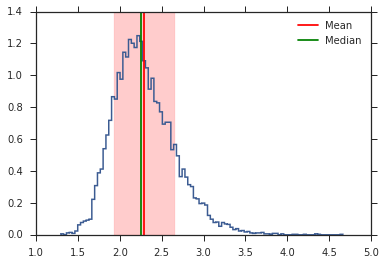

In [414]:
pp.figure()
pp.hist(apv, bins=100, histtype='step', normed=True, color=sns.xkcd_rgb['denim blue'], lw=1.5)
pp.plot([apv_mean, apv_mean], [0.0, 1.4], color='r', label='Mean')
pp.plot([np.median(apv), np.median(apv)], [0.0, 1.4], color='g', label='Median')
pp.fill_between([apv_mean-apv_err, apv_mean+apv_err], 0.0, 1.4, color='r', alpha=0.2)
pp.legend(loc='upper right')
pp.show()

In [415]:
%time calculate_apv_uncertainty(data, label)

CPU times: user 15.7 s, sys: 15.5 ms, total: 15.7 s
Wall time: 15.8 s


In [430]:
data.A_pv.loc['A_neutral'].mean()

2.2706628986756576

In [416]:
means = np.ones(len(label))
std = np.ones(len(label))

In [417]:
for l in range(len(label)):
    means[l] = np.mean(data.A_pv.loc[label[l]])
    std[l] = np.std(data.A_pv.loc[label[l]])

In [418]:
bar_range = np.arange(0.0,len(label))

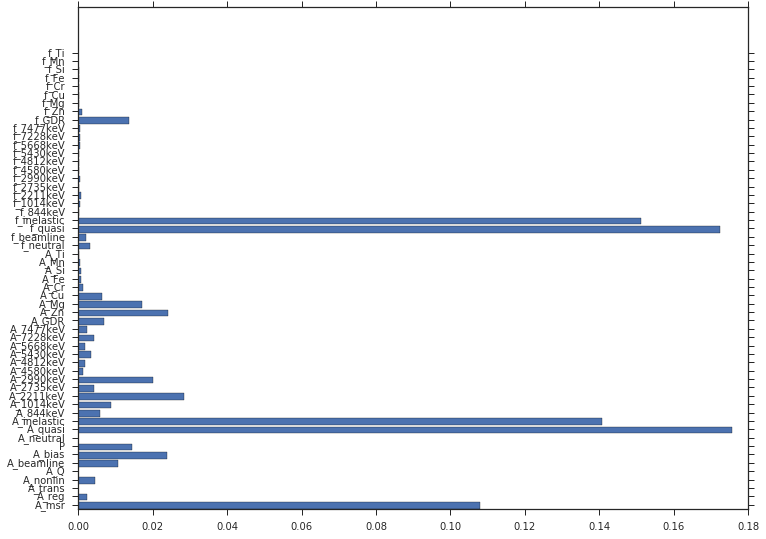

In [419]:
pp.figure(figsize=(12,9))
pp.barh(bar_range, std)
pp.yticks(bar_range+0.5, label)#, rotation=90, horizontalalignment='center')
pp.show()

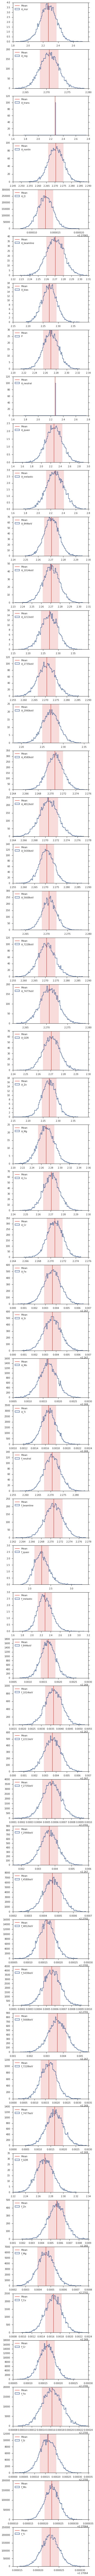

In [432]:
f, ax = pp.subplots(len(label),1, figsize=(6.022500138888888, len(label)*3.7221097830842953))
pp.subplots_adjust(hspace=0.2)
for l in range(len(label)):
    ax[l].hist(data.loc[label[l]].A_pv, 
               bins=100, 
               histtype='step', 
               normed=True, 
               color=sns.xkcd_rgb['denim blue'], 
               lw=1.5, 
               label=label[l])
    ymin, ymax = ax[l].get_ylim()
    ax[l].plot([means[l],means[l]], [ymin, ymax], color=sns.xkcd_rgb['pale red'], label='Mean')
    ax[l].fill_between([means[l]-std[l], means[l]+std[l]], ymin, ymax, color=sns.xkcd_rgb['pale red'], alpha=0.2)
    ax[l].tick_params(top=False)
    ax[l].legend(loc='upper left')

In [390]:
for l in range(len(label)):
    print("{:s}: {:.6f} +- {:.6f} [ppm]".format(label[l], means[l], std[l]))

A_msr: 2.270089 +- 0.108411 [ppm]
A_reg: 2.270659 +- 0.002213 [ppm]
A_nonlin: 2.270549 +- 0.004596 [ppm]
A_Q: 2.270663 +- 0.000002 [ppm]
A_beamline: 2.270538 +- 0.010405 [ppm]
A_bias: 2.270794 +- 0.024002 [ppm]
P: 2.270859 +- 0.014365 [ppm]
A_neutral: 2.270663 +- 0.000000 [ppm]
A_quasi: 2.270266 +- 0.177779 [ppm]
A_inelastic: 2.271886 +- 0.142122 [ppm]
A_844keV: 2.270687 +- 0.005799 [ppm]
A_1014keV: 2.270505 +- 0.008679 [ppm]
A_2211keV: 2.271169 +- 0.027717 [ppm]
A_2735keV: 2.270608 +- 0.004047 [ppm]
A_2990keV: 2.270546 +- 0.020535 [ppm]
A_4580keV: 2.270652 +- 0.001300 [ppm]
A_4812keV: 2.270675 +- 0.001744 [ppm]
A_5430keV: 2.270641 +- 0.003376 [ppm]
A_5668keV: 2.270664 +- 0.001746 [ppm]
A_7228keV: 2.270659 +- 0.003983 [ppm]
A_7477keV: 2.270662 +- 0.002232 [ppm]
A_GDR: 2.270659 +- 0.006711 [ppm]
A_Zn: 2.270750 +- 0.024381 [ppm]
A_Mg: 2.270923 +- 0.017097 [ppm]
A_Cu: 2.270666 +- 0.006503 [ppm]
A_Cr: 2.270649 +- 0.001230 [ppm]
A_Fe: 2.270673 +- 0.000764 [ppm]
A_Si: 2.270661 +- 0.000809 [p

In [392]:
for l in range(len(label)):
    print("{:s}: {:.6f}".format(label[l], 100.0*(std[l]/means[l])))

A_msr: 4.775628
A_reg: 0.097479
A_nonlin: 0.202403
A_Q: 0.000071
A_beamline: 0.458243
A_bias: 1.056983
P: 0.632561
A_neutral: 0.000000
A_quasi: 7.830738
A_inelastic: 6.255702
A_844keV: 0.255380
A_1014keV: 0.382247
A_2211keV: 1.220405
A_2735keV: 0.178229
A_2990keV: 0.904396
A_4580keV: 0.057269
A_4812keV: 0.076784
A_5430keV: 0.148665
A_5668keV: 0.076872
A_7228keV: 0.175399
A_7477keV: 0.098293
A_GDR: 0.295545
A_Zn: 1.073680
A_Mg: 0.752876
A_Cu: 0.286402
A_Cr: 0.054167
A_Fe: 0.033645
A_Si: 0.035641
A_Mn: 0.012912
A_Ti: 0.005971
f_neutral: 0.143232
f_beamline: 0.084889
f_quasi: 7.540563
f_inelastic: 6.635638
f_844keV: 0.010662
f_1014keV: 0.019627
f_2211keV: 0.035434
f_2735keV: 0.004877
f_2990keV: 0.023350
f_4580keV: 0.002707
f_4812keV: 0.001159
f_5430keV: 0.004376
f_5668keV: 0.024597
f_7228keV: 0.016019
f_7477keV: 0.014690
f_GDR: 0.609930
f_Zn: 0.039989
f_Mg: 0.002997
f_Cu: 0.007661
f_Cr: 0.001113
f_Fe: 0.000951
f_Si: 0.001695
f_Mn: 0.000105
f_Ti: 0.000092


In [393]:
# Mean difference
for l in range(len(label)):
    print('{:s}: {:.6f}'.format(label[l], 100.0*(apv_mean-means[l])/apv_mean))

A_msr: 0.787982
A_reg: 0.763041
A_nonlin: 0.767870
A_Q: 0.762881
A_beamline: 0.768341
A_bias: 0.757153
P: 0.754327
A_neutral: 0.762880
A_quasi: 0.780226
A_inelastic: 0.709405
A_844keV: 0.761813
A_1014keV: 0.769791
A_2211keV: 0.740764
A_2735keV: 0.765282
A_2990keV: 0.767999
A_4580keV: 0.763374
A_4812keV: 0.762332
A_5430keV: 0.763843
A_5668keV: 0.762812
A_7228keV: 0.763069
A_7477keV: 0.762904
A_GDR: 0.763047
A_Zn: 0.759078
A_Mg: 0.751511
A_Cu: 0.762758
A_Cr: 0.763508
A_Fe: 0.762452
A_Si: 0.762961
A_Mn: 0.763020
A_Ti: 0.762864
f_neutral: 0.761210
f_beamline: 0.761931
f_quasi: 0.230440
f_inelastic: 0.563757
f_844keV: 0.762852
f_1014keV: 0.762769
f_2211keV: 0.762522
f_2735keV: 0.762834
f_2990keV: 0.763181
f_4580keV: 0.762890
f_4812keV: 0.762875
f_5430keV: 0.762861
f_5668keV: 0.763171
f_7228keV: 0.762830
f_7477keV: 0.763115
f_GDR: 0.769278
f_Zn: 0.762860
f_Mg: 0.762920
f_Cu: 0.762936
f_Cr: 0.762864
f_Fe: 0.762880
f_Si: 0.762864
f_Mn: 0.762880
f_Ti: 0.762880
